## **Описание проекта**

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Имеются данные до 2016 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## **Описание данных**

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## **Цель исследования**

- Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

## **План работы**

**Шаг 1. Открыть файл с данными и изучить общую информацию**
- Загрузить данные из файла в датафрейм.
- Изучить общую информацию о полученном датафрейме.

**Шаг 2. Подготовить данные**
- Заменить названия столбцов (привести к нижнему регистру);
- Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему;
- Обработать пропуски при необходимости:
- Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;
- Описать причины, которые могли привести к пропускам;
- Обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрать это значение и описать, как его обработать;
- Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

**Шаг 3. Провести исследовательский анализ данных**
- Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Взять данные за соответствующий актуальный период. Актуальный период определить в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывать в работе данные за предыдущие годы.
- Рассмотреть, как платформы лидируют по продажам, растут или падают. Выбрать несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
- Соотнести выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Шаг 4. Составить портрет пользователя каждого региона**
- Определить для пользователя каждого региона (NA, EU, JP):
1. Самые популярные платформы (топ-5). Описать различия в долях продаж.
2. Самые популярные жанры (топ-5). Пояснить разницу.
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Шаг 5. Проверить гипотезы**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

- Пояснить:
1. Сформулировать нулевую и альтернативную гипотезы;
2. Применять определенный критерий для проверки гипотез и объяснить почему.

**Шаг 6. Написать общий вывод**

## 1. Ознакомление с данными

**Импортируем необходимые библиотеки и загружаем данные из файла в датафрейм:**

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import numpy as np
from scipy import stats as st

import warnings
warnings.filterwarnings("ignore")

In [2]:
try:
    data = pd.read_csv('C:/Users/Acer/Desktop/project_1/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

**Рассмотрим полученные данные из датафрейма:**

In [3]:
# Выведем первые 5 строк датафрейма
data.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [4]:
# Выведем основные характеристики датафрейма (типы столбцов, пропущенные значения)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод: Всего в датафрейме 16 715 строк - это данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Имеется 11 столбцов, характеризующих продажи, больше всего пропусков в столбцах `Critic_Score`, `User_Score` и `Rating`. Также можно отметить, что значения столбца `User_Score`  принадлежит типу object, возможно, в данном столбце присутствуют строковые значения. Тип данных столбца `Year_of_Release` следует изменить на целочисленный. Наименования столбцов следует изменить на соответсвующий правилам составления кода PEP8.**

## 2. Подготовка данных

In [5]:
# Создадим функцию, которая подсчитывает и выводит количество пропущенных значений в столбцах
def missing_value(data, col):
    if data[col].count() != max(data.count()):
        print(f'В столбце {col} пропущено {data[col].isna().sum()} значений'
              f'({data[col].isna().sum() / max(data.count()):.2%})'
              f' от общего числа объявлений')
    else:
        print(f'В столбце {col} пропущенных значений нет')

- Приведем наименования столбцов к нижнему регистру:

In [6]:
data.columns = data.columns.str.lower()

 - Рассмотрим каждый отдельный столбец и заполним пропущенные значения там, где это возможно.

**1. Столбец `name` - название игры**

In [7]:
data['name'].describe()

count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object

Всего было продано 11 559 уникальных игр, наиболее часто встречающаяся игра - Need for Speed: Most Wanted - она была выпущена на 12 платформах.

In [8]:
missing_value(data, 'name')

В столбце name пропущено 2 значений(0.01%) от общего числа объявлений


In [9]:
# выведем строки с пропцщенными значениями в столбце name
data.query('name.isna()')

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN

Всего в столбце `name` два пропущенных значения. Также можно отметить, что пропущены значения не только в столбце name:  неизвестен жанр, а также оценки критиков, пользователей и рейтинг. Возможно, что пропущенные значения могли образоваться по причине того, что игра выпущена достаточно давно и в то время не существовало как таковой системы оценивания игр.

Так как пропущенных значений всего два, удалим их из датафрейма:

In [10]:
data = data.query('not name.isna()')

**2. Столбец `platform` - платформа**

In [11]:
missing_value(data, 'platform')

В столбце platform пропущенных значений нет


In [12]:
data['platform'].describe()

count     16713
unique       31
top         PS2
freq       2161
Name: platform, dtype: object

In [13]:
# выведем платформы, на которых часто продавались игры
data['platform'].value_counts().head(10)

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
Name: platform, dtype: int64

Всего уникальных платформ - 31. На платформе PS2 было продано больше всего игр - 2161.

**3. Столбец `year_of_release` — год выпуска**

In [14]:
missing_value(data, 'year_of_release')

В столбце year_of_release пропущено 269 значений(1.61%) от общего числа объявлений


In [15]:
data['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [16]:
data['year_of_release'].value_counts().head(10)

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
Name: year_of_release, dtype: int64

In [17]:
round(data.query('year_of_release >= 2000')['year_of_release'].count() / len(data) * 100, 1) 

86.6

Самый ранний год выпуска - 1980, самый поздний - 2016. 86,6% игр (14470) от общего числа проданных игр выпущены с 2000 года и позднее. 

Это может быть связано с тем, что именно на эти годы приходится развитие технологий (рост производительности компьютеров, улучшение графики), что позволило разрабатывать больше игр различных жанров и сложностей.

Так как пропущенных значений в столбце не так много, удалим их:

In [18]:
data = data.query('not year_of_release.isna()')

In [19]:
# приведем столдец к целочисленному типу
data['year_of_release'] = data['year_of_release'].astype('int')

**4. Столбец `genre` — жанр игры**

In [20]:
missing_value(data, 'genre')

В столбце genre пропущенных значений нет


In [21]:
data['genre'].describe()

count      16444
unique        12
top       Action
freq        3307
Name: genre, dtype: object

In [22]:
data['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

Всего уникальных жанров - 12. Больше всего игр выпущено в жанрах Action и Sports.

**5. Столбец `na_sales` — продажи в Северной Америке (миллионы проданных копий)**

In [23]:
missing_value(data, 'na_sales')

В столбце na_sales пропущенных значений нет


In [24]:
data['na_sales'].describe()

count    16444.000000
mean         0.264012
std          0.818378
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

In [25]:
# посмотрим, у какой игры были максимальные продажи в Северной Америке
data.loc[data['na_sales'] == max(data['na_sales'])]

name platform  year_of_release   genre  na_sales  eu_sales  jp_sales  \
0  Wii Sports      Wii             2006  Sports     41.36     28.96      3.77   

   other_sales  critic_score user_score rating  
0         8.45          76.0          8      E

In [26]:
# найдем количество игр с нулевыми продажами
len(data.loc[data['na_sales'] == min(data['na_sales'])])

4449

Пропущенных значений в данном столбце нет. Около четверти игр не были проданы в Северной Америке.

**6. Столбец eu_sales — продажи в Европе (миллионы проданных копий)**

In [27]:
missing_value(data, 'eu_sales')

В столбце eu_sales пропущенных значений нет


In [28]:
data['eu_sales'].describe()

count    16444.000000
mean         0.145930
std          0.506716
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

In [29]:
# посмотрим, у какой игры были максимальные продажи в Европе
data.loc[data['eu_sales'] == max(data['eu_sales'])]

name platform  year_of_release   genre  na_sales  eu_sales  jp_sales  \
0  Wii Sports      Wii             2006  Sports     41.36     28.96      3.77   

   other_sales  critic_score user_score rating  
0         8.45          76.0          8      E

У данной игры были также максимальные продажи в Северной Америке.

In [30]:
# найдем количество игр с нулевыми продажами
len(data.loc[data['eu_sales'] == min(data['eu_sales'])])

5766

Пропущенных значений в данном столбце нет. Больше четверти игр не были проданы в Европе.

**7. Столбец jp_sales — продажи в Японии (миллионы проданных копий)**

In [31]:
missing_value(data, 'jp_sales')

В столбце jp_sales пропущенных значений нет


In [32]:
data['jp_sales'].describe()

count    16444.000000
mean         0.078487
std          0.311100
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

In [33]:
# посмотрим, у какой игры были максимальные продажи в Японии
data.loc[data['jp_sales'] == max(data['jp_sales'])]

name platform  year_of_release         genre  na_sales  \
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
4      8.89     10.22          1.0           NaN        NaN    NaN

In [34]:
# найдем количество игр с нулевыми продажами
len(data.loc[data['jp_sales'] == min(data['jp_sales'])])

10300

Более половины представленных игр не были проданы в Японии. Игра с максимальными продажами - Pokemon Red/Pokemon Blue

**8. Столбец other_sales — продажи в других странах (миллионы проданных копий)**

In [35]:
missing_value(data, 'other_sales')

В столбце other_sales пропущенных значений нет


In [36]:
data['other_sales'].describe()

count    16444.000000
mean         0.047594
std          0.188005
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

In [37]:
# посмотрим, у какой игры были максимальные продажи в других странах
data.loc[data['other_sales'] == max(data['other_sales'])]

name platform  year_of_release   genre  na_sales  \
17  Grand Theft Auto: San Andreas      PS2             2004  Action      9.43   

    eu_sales  jp_sales  other_sales  critic_score user_score rating  
17       0.4      0.41        10.57          95.0          9      M

In [38]:
# найдем количество игр с нулевыми продажами
len(data.loc[data['other_sales'] == min(data['other_sales'])])

6492

Пропущенных значений в столбце other_sales нет. Более трети игр не были проданы в других странах.

**9. Столбец critic_score — оценка критиков (максимум 100)**

In [39]:
missing_value(data, 'critic_score')

В столбце critic_score пропущено 8461 значений(51.45%) от общего числа объявлений


In [40]:
data['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

В столбце critic_score пропущено более половины от всех значений. Проверим, есть ли зависимость от каких-либо параметров:

In [41]:
data.corr()['critic_score']

year_of_release    0.011411
na_sales           0.240083
eu_sales           0.221276
jp_sales           0.153474
other_sales        0.198410
critic_score       1.000000
Name: critic_score, dtype: float64

Сильной корреляции не наблюдается. Возможно, существует более сложная зависимость от какого-либо параметра

In [42]:
# проверим, как распределялись оценки критиков по годам
year = data.pivot_table(index='year_of_release', values='critic_score', aggfunc='count')

До 1995 года критики практически не ставили играм оценки, так как такая система оценивания еще не была введена.

Проверим, на какие года приходится большинство пропусков:

In [43]:
data.query('critic_score.isna()')['year_of_release'].value_counts().head(10)

2009    775
2010    755
2008    712
2011    636
2007    505
2006    386
2015    381
1998    351
2012    332
2014    320
Name: year_of_release, dtype: int64

Больше всего пропусков - с 2006 по 2011 года.

Заполнять данный столбце не будем, так как оценки это довольно субъективная величина, которую нельзя заменить медианой/средним и после этого получить достоверные данные.

**10. Столбец user_score — оценка пользователей (максимум 10)**

In [44]:
missing_value(data, 'user_score')

В столбце user_score пропущено 6605 значений(40.17%) от общего числа объявлений


In [45]:
data['user_score'].describe()

count     9839
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object

В столбце достаточно много пропусков. Также помимо пропущенных значений присутствует 2 376 строковых значения `tbd`. tbd (расш. To Be Determined) означает "Будет определено". Видимо, оценка пользователей не подсчитана ввиду либо их большого количества, либо технических причин. Присвоим значение tbd к типу NaN

In [46]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

Заполнять пропущенные значения в данном столбце также не будем.

**11. Столбец rating — рейтинг от организации ESRB**

In [47]:
missing_value(data, 'rating')

В столбце rating пропущено 6676 значений(40.60%) от общего числа объявлений


In [48]:
data['rating'].describe()

count     9768
unique       8
top          E
freq      3921
Name: rating, dtype: object

In [49]:
# посмотрим, какие категории рейтингов присутствуют в данных
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

 Расшифровка рейтингов от организации ESRB:
 
 - «EC» («Early childhood») — «Для детей младшего возраста»
 - «E» («Everyone») — «Для всех»
 - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
 - «T» («Teen») — «Подросткам»
 - «M» («Mature») — «Для взрослых»
 - «AO» («Adults Only 18+») — «Только для взрослых»
 - «RP» («Rating Pending») — «Рейтинг ожидается»
 - «K-A» «(Kids to Adults») - «Для детей и взрослых»

проверим, одна ли природа у пропусков в столбцах critic_score, user_score и rating:

Text(0.5, 1.0, 'Количество пропущенных значений оценок критиков, пользователей и значения рейтинга')

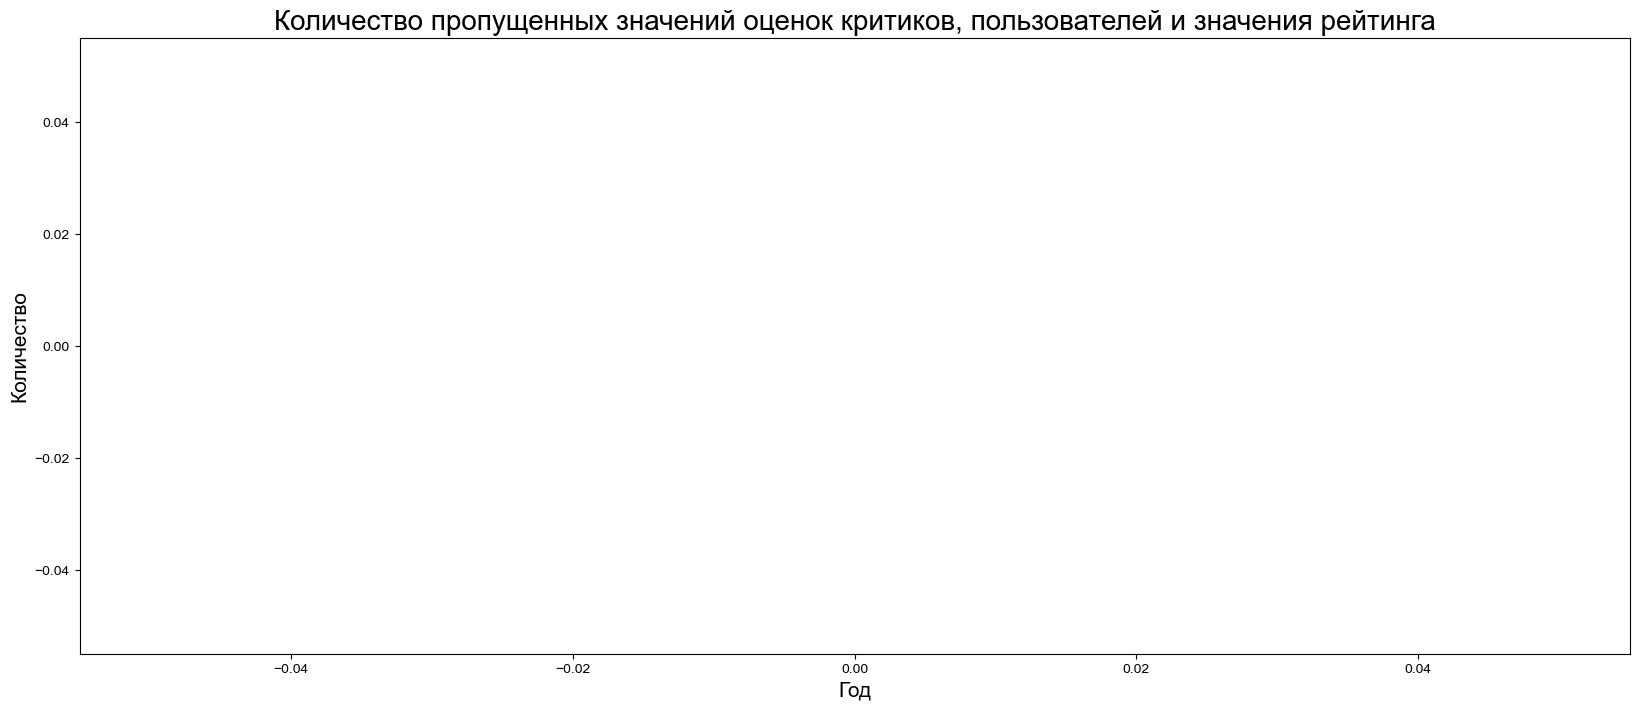

In [50]:
fix, ax = plt.subplots(figsize=(20, 8))

sns.lineplot(data.query('critic_score.isna()')['year_of_release'].value_counts(),
             color=sns.color_palette('deep')[0], 
             marker="o",
             linewidth=3,
             ax = ax)

sns.lineplot(data.query('user_score.isna()')['year_of_release'].value_counts(),
             color=sns.color_palette('deep')[1], 
             marker="o",
             linewidth=3,
             ax = ax)

sns.lineplot(data.query('rating.isna()')['year_of_release'].value_counts(),
             color=sns.color_palette('deep')[2], 
             marker="o",
             linewidth=3,
             ax = ax)
sns.set_style("whitegrid")
plt.xlabel('Год', fontsize=15)
plt.ylabel("Количество", fontsize=15)
plt.title('Количество пропущенных значений оценок критиков, пользователей и значения рейтинга', fontsize=20)

Количество пропущенных значений в столбцах rating, critic_score и user_score практически полностью совпадало до 1999 года. Объяснить это можно тем, что система оценивания еще не была распространена и отзывы с рейтингами заполнялись только в одной системе. 

С 2000 года характер пропущенных значений в столбцах critic_score и user_score схож между собой. В столбце rating в целом меньше пропусков ввиду того, что рейтинг зачастую определять не нужно, так как он прилагается к игре, в то же время характер графика схож с двумя другими. Так что вполне возможно, что пропущенные значения в данных 3 столбцах имеют одинаковую природу.


Заменим пропущенные значения в столбце rating категорией `other`:

In [51]:
data['rating'] = data['rating'].fillna('other')

In [52]:
data['rating'].value_counts()

other    6676
E        3921
T        2905
M        1536
E10+     1393
EC          8
K-A         3
AO          1
RP          1
Name: rating, dtype: int64

Больше всего игр в категории `other, E, T, M и E10+`.

- Проверим, присутствуют ли дубликаты в датафрейме:

In [53]:
data.duplicated().sum()

0

Явных дупликатов нет.

Попробуем найти неявные дупликаты - проверим, есть ли они в столбцах `name, platform, year_of_release, genre`:

In [54]:
data[['name', 'platform', 'year_of_release', 'genre']].duplicated().sum()

1

Нашелся один дупликат. Посмотрим, что это за игра:

In [55]:
data.loc[data[['name', 'platform', 'year_of_release', 'genre']].duplicated() == True]

name platform  year_of_release   genre  na_sales  eu_sales  \
16230  Madden NFL 13      PS3             2012  Sports       0.0      0.01   

       jp_sales  other_sales  critic_score  user_score rating  
16230       0.0          0.0          83.0         5.5      E

In [56]:
data.query('name == "Madden NFL 13" and platform == "PS3"')

name platform  year_of_release   genre  na_sales  eu_sales  \
604    Madden NFL 13      PS3             2012  Sports      2.11      0.22   
16230  Madden NFL 13      PS3             2012  Sports      0.00      0.01   

       jp_sales  other_sales  critic_score  user_score rating  
604         0.0         0.23          83.0         5.5      E  
16230       0.0         0.00          83.0         5.5      E

Оставим первую первую запись, так как в ней больше данных:

In [57]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release', 'genre'], keep='first')

- добавим столбец, который суммирует продажи во всех регионах:

In [58]:
data['total'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

- Подсчитаем долю удаленных строк датафрейма:

In [59]:
round((16715 - len(data)) / 16715, 2)

0.02

**Вывод:**
- обработали пропущенные значения:
1. В столбцах `name и year_of_release` удалили 2 и 269 пропущенных значений соответственно. Столбец `year_of_release` привели к целочисленному типу данных.
2. В столбцах `critic_score и user_score` 8461 и 8981 пропущенных значений оставили. Заполнить пропуски достоверно не получится, так как оценки пользователей и критиков - это субъективные данные, которые сложно предсказать. В столбце `user_score` 2 376 строковых значения tbd(расш. To Be Determined) привели к типу данных NaN.
3. В столбцах `na_sales, eu_sales, jp_sales, other_sales, platform, genre` пропущенных значений нет.
4. В столбце `rating` значения NaN перевели в категорию `other`.

- удалили 1 неявный дупликат
- выявили, что пропущенные значения в столбцах `rating, critic_score и user_score` имеют одинаковую природу
- привели названия столбцов к нижнему регистру
- посчитали суммарные продажи во всех регионах и записали их в отдельный столбец `total`.
- доля удаленных данных из датафрейма - 0,02

## 3. Исследовательский анализ данных

**1. Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

In [60]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values(by='name')

name
year_of_release      
1980                9
1984               14
1985               14
1988               15
1990               16
1987               16
1989               17
1983               17
1986               21
1982               36
1991               41
1992               43
1981               46
1993               60
1994              121
1995              219
1996              263
1997              289
1999              338
2000              350
1998              379
2001              482
2016              502
2013              544
2014              581
2015              606
2012              652
2004              762
2003              775
2002              829
2005              939
2006             1006
2011             1136
2007             1197
2010             1255
2009             1426
2008             1427

Text(0.5, 1.0, 'Количество выпущенных игр')

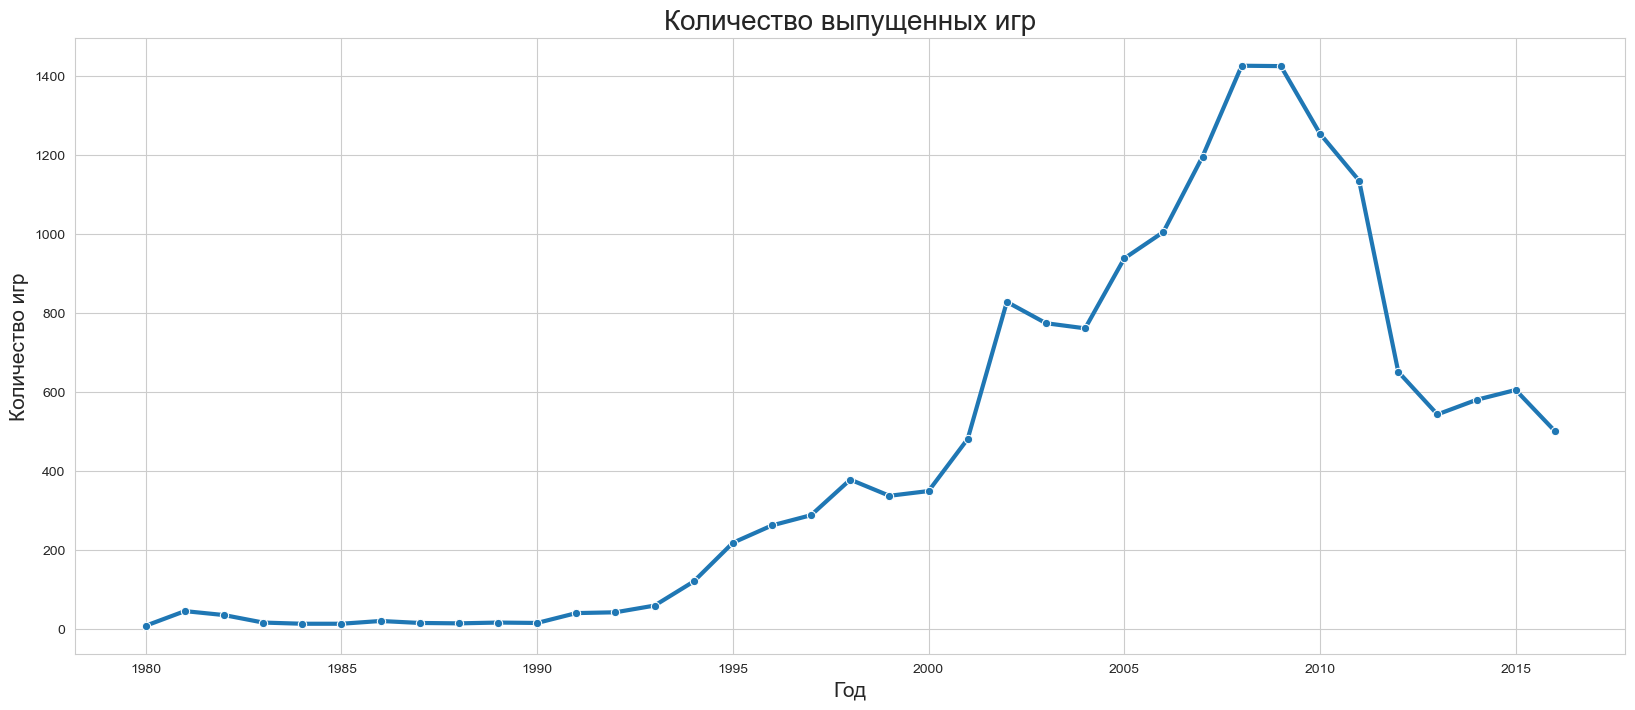

In [61]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=data.pivot_table(index='year_of_release', values='name', aggfunc='count'), 
             color=sns.color_palette('deep')[0], 
             marker="o", 
             linewidth=3,
             legend=False)
sns.set_style("whitegrid")
plt.xlabel('Год', fontsize=15)
plt.ylabel("Количество игр", fontsize=15)
plt.title('Количество выпущенных игр', fontsize=20)

Наблюдается увеличение продаж начиная с 1990 до 2008 года. До этого периода спрос на игры был небольшим, так как первый персональный компьютер появился только в 1981 году и использовался чаще для работы в компаниях, нежели для игр. Со временем, популярность компьютеров возрастала, как и их производительность, что позволяло выпускать все более вариативные игры с лучшей графикой, как следствие это повышало спрос на игры.

С 2008 года произошло снижение продаж. Возможно, что причиной послужил кризис 2008 года, а также возрастающая популярность социальных сетей, мобильных телефонов, которые переключили внимание покупателей на себя.

Можно рассматривать данные, начиная от 1995 года, так как в 1995 год значение продаж достигло 200 игр, что можно назвать достаточно большой выборкой.

**2. Как менялись продажи по платформам? Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [62]:
# найдем платформы с наибольшими суммарными продажами
data.groupby('platform').agg({'total':'sum'}).sort_values(by='total', ascending=False).head(10)

total
platform         
PS2       1233.56
X360       961.24
PS3        931.33
Wii        891.18
DS         802.78
PS         727.58
PS4        314.14
GBA        312.88
PSP        289.53
3DS        257.81

Больше всего сумма продаж у первых шести платформ, рассмотрим их:

In [63]:
# запишем наименования шести платформ с наибольшими продажами
top_six = data.groupby('platform').agg({'total':'sum'}).sort_values(by='total', ascending=False) \
              .reset_index().head(6)['platform']

In [64]:
# сгруппироуем данные по 6 платформам
data.query('platform in @top_six').groupby(['platform', 'year_of_release']).agg({'total':'sum'})

total
platform year_of_release        
DS       1985               0.02
         2004              17.27
         2005             130.14
         2006             119.81
         2007             146.94
...                          ...
X360     2012              99.74
         2013              88.58
         2014              34.74
         2015              11.96
         2016               1.52

[67 rows x 1 columns]

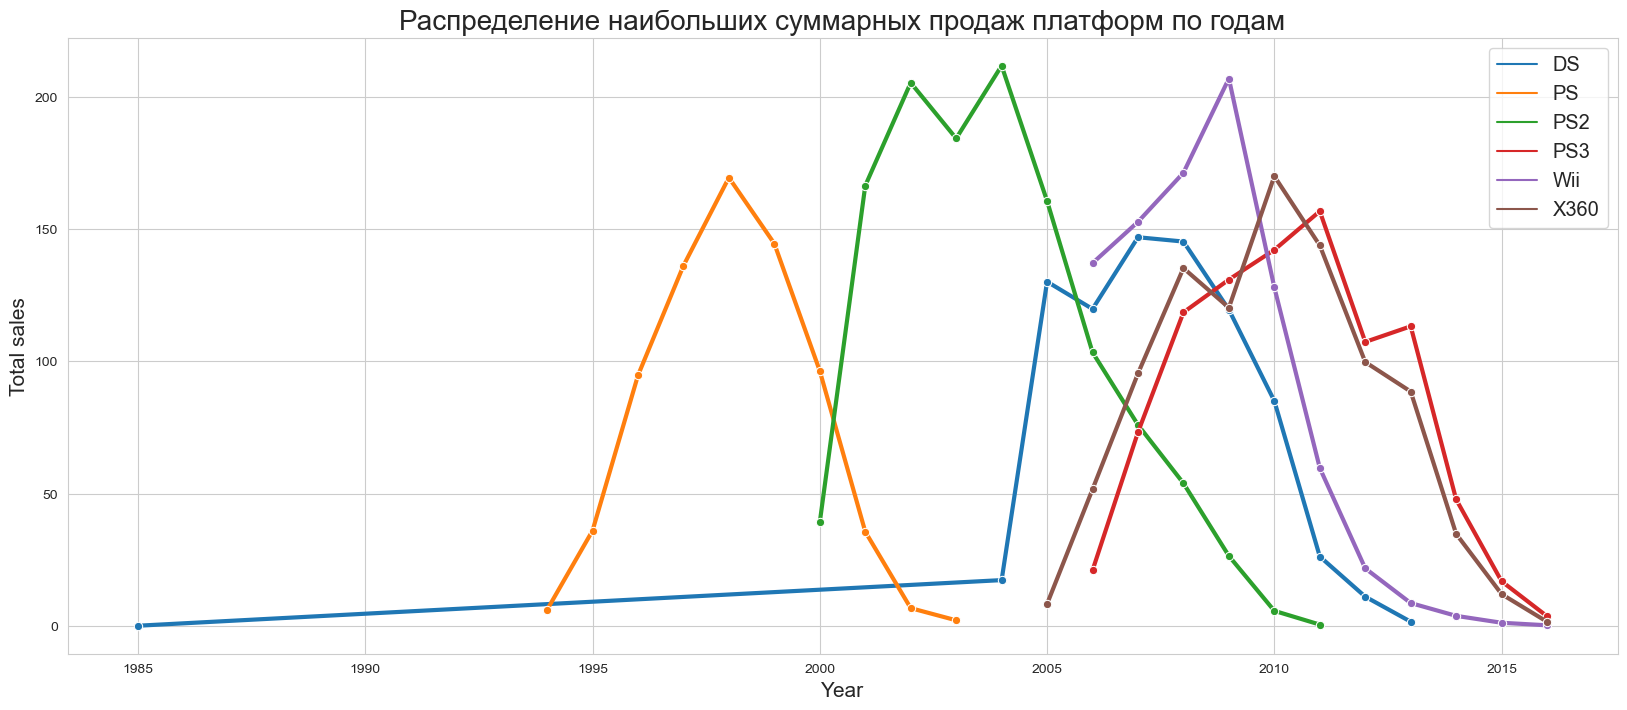

In [65]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=data.query('platform in @top_six').groupby(['platform', 'year_of_release']).agg({'total':'sum'}), 
            y='total', 
            x='year_of_release', 
            hue='platform', 
            marker="o",
            linewidth=3)
sns.set_style("whitegrid")
plt.xlabel('Year', fontsize=15)
plt.ylabel("Total sales", fontsize=15)
plt.title('Распределение наибольших суммарных продаж платформ по годам', fontsize=20)
plt.legend(fontsize='x-large')

Время жизни платформ:
1. DS - 28 лет (1985 - 2013). Количество лет до спада продаж - 23 года
2. PS - 9 лет (1994 - 2003). Количество лет до спада продаж - 4 года
3. PS2 - 11 лет (2000 - 2011). Количество лет до спада продаж - 4 года
4. PS3 - 10 лет (2006 - 2016). Количество лет до спада продаж - 6 лет
5. Wii - 10 лет (2006 - 2016). Количество лет до спада продаж - 3 года
6. X360 - 11 лет (2005 - 2016). Количество лет до спада продаж - 5 лет

Из шести платформ выделяется по времени жизни DS, первые продажи - в 1985 году, затем до 2004 года продаж не было, с 2004 года рост продаж вплоть до 2013 года. 

Можно принять, что характерный срок появления/ухода новых и старых платформы составляет 10 лет. При этом, продажи начинают падать после 4-5 лет после появления платформы на рынке.

Text(0.5, 1.0, 'Распределение общего количества платформ по годам')

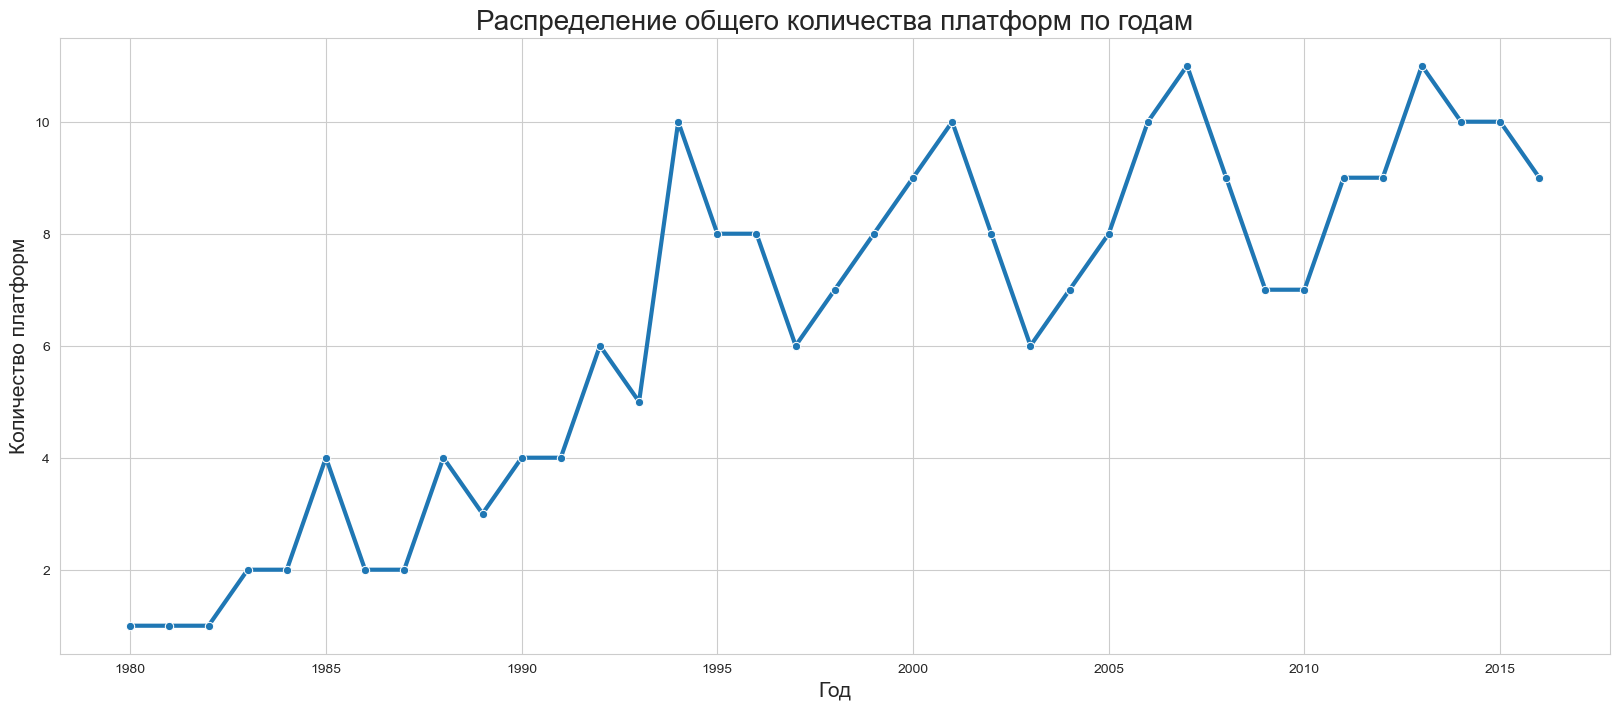

In [66]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=data.groupby('year_of_release').agg({'platform':'nunique'}), 
            marker="o",
            linewidth=3,
            legend=False)
sns.set_style("whitegrid")
plt.xlabel('Год', fontsize=15)
plt.ylabel("Количество платформ", fontsize=15)
plt.title('Распределение общего количества платформ по годам', fontsize=20)

Появление/исчезновение платформ на рынке носит цикличный характер. 

С 2012 по 2013 количество новых платформ увеличилось. После 2013 года количество платформ снова уменьшилось. С учетом того, что продажи начинают падать после 4-5 лет после появления новой платформы на рынке, будем рассматривать данные с 2013 года.

**3. Взять данные за соответствующий актуальный период. Актуальный период определить в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.**

Возьмем данные с 2013 года:

In [67]:
new_data = data.query('year_of_release >= 2013')

In [68]:
# Выведем первые 5 строк нового датафрейма
new_data.head()

name platform  year_of_release         genre  \
16         Grand Theft Auto V      PS3             2013        Action   
23         Grand Theft Auto V     X360             2013        Action   
31  Call of Duty: Black Ops 3      PS4             2015       Shooter   
33        Pokemon X/Pokemon Y      3DS             2013  Role-Playing   
42         Grand Theft Auto V      PS4             2014        Action   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16      7.02      9.09      0.98         3.96          97.0         8.2   
23      9.66      5.14      0.06         1.41          97.0         8.1   
31      6.03      5.86      0.36         2.38           NaN         NaN   
33      5.28      4.19      4.35         0.78           NaN         NaN   
42      3.96      6.31      0.38         1.97          97.0         8.3   

   rating  total  
16      M  21.05  
23      M  16.27  
31  other  14.63  
33  other  14.60  
42      M  12.62

In [69]:
# Выведем основные характеристики нового датафрейма (типы столбцов, пропущенные значения)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int32  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  total            2233 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 218.1+ KB


Теперь в актуальном датафрейме 2233 данных о продажах, пропущенные значения имеются только в столбцах `critic_score и user_score`

**4. Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.**

In [70]:
plt.figure(figsize=(20, 8))
px.line(new_data.groupby(['platform', 'year_of_release']).agg({'total':'sum'}).reset_index(), 
        x="year_of_release", 
        y="total", 
        color="platform") \
.update_traces(mode='markers+lines') \
.update_layout(plot_bgcolor='rgba(0,0,0,0)', 
               title = {
                         'text': "Распределение суммарных продаж по платформам",
                         'y':0.95, # new
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top' # new
                        },
                xaxis_title="Год",
                yaxis_title="Сумма продаж",
                font=dict(
                         size=15
                        )) \
.update_xaxes(showline=True, 
              linewidth=2, 
              linecolor='black', 
              gridcolor='LightGrey') \
.show()


plt.figure(figsize=(20, 8))
px.line(new_data.groupby(['platform', 'year_of_release']).agg({'total':'median'}).reset_index(), 
        x="year_of_release", 
        y="total", 
        color="platform") \
.update_traces(mode='markers+lines') \
.update_layout(plot_bgcolor='rgba(0,0,0,0)', 
               title = {
                         'text': "Распределение медианных продаж по платформам",
                         'y':0.95, # new
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top' # new
                        },
                xaxis_title="Год",
                yaxis_title="Медиана продаж",
                font=dict(
                          size=15
                        )) \
.update_xaxes(showline=True, 
              linewidth=2, 
              linecolor='black', 
              gridcolor='LightGrey') \
.show()

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

Рассмотрим отдельно продажи для каждой платформы:

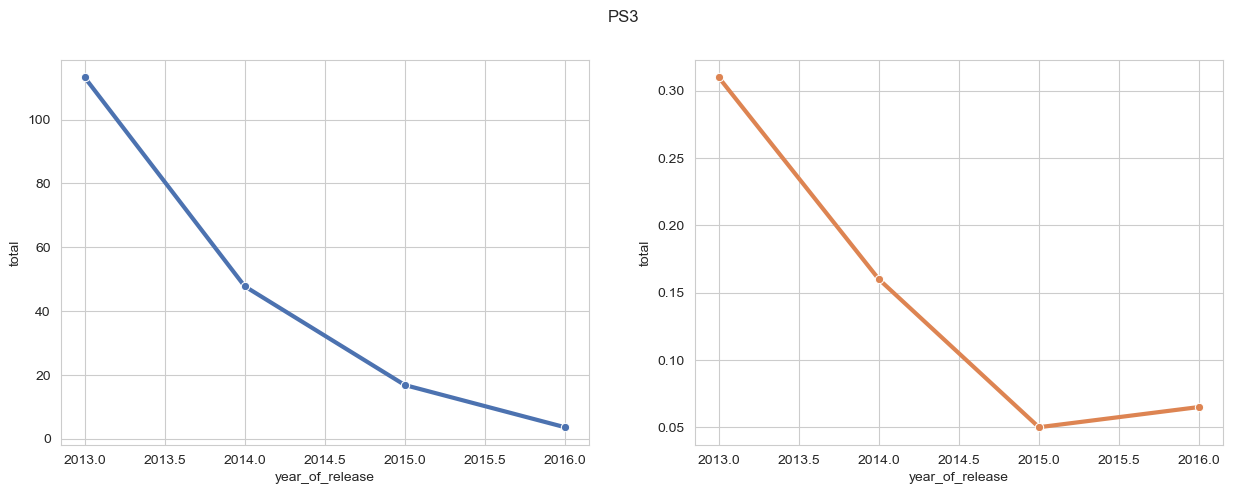

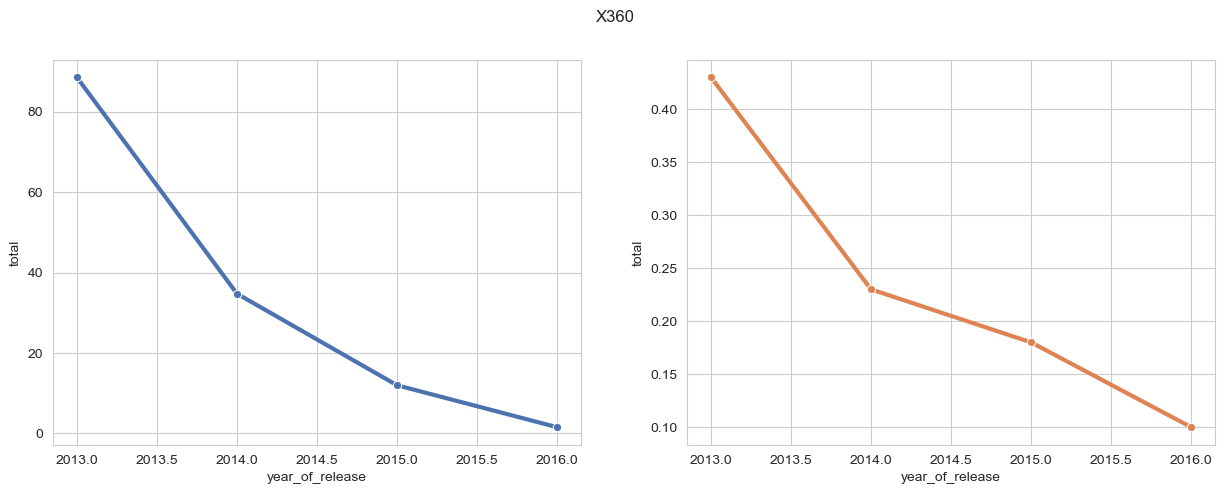

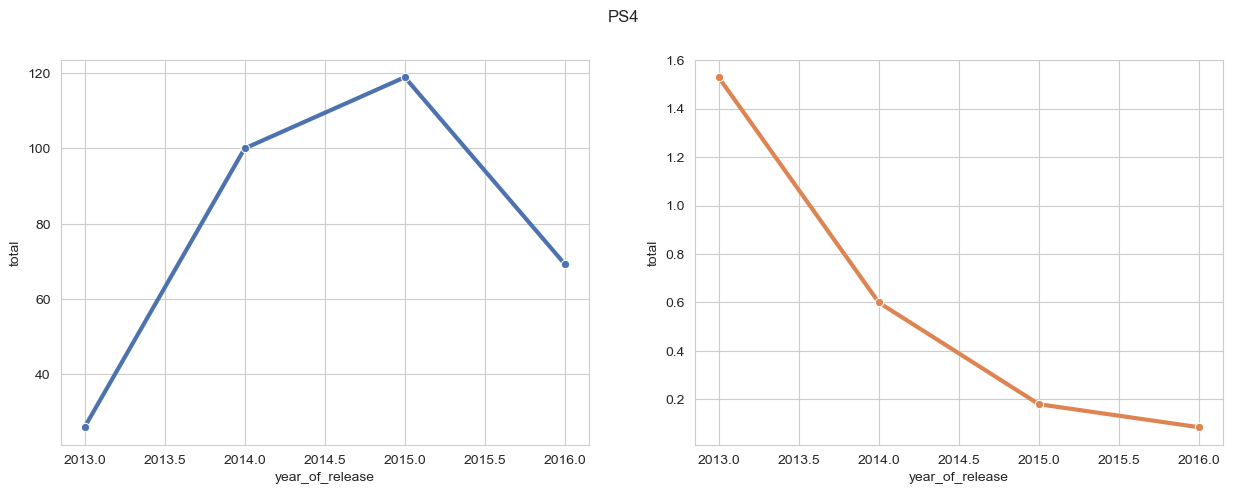

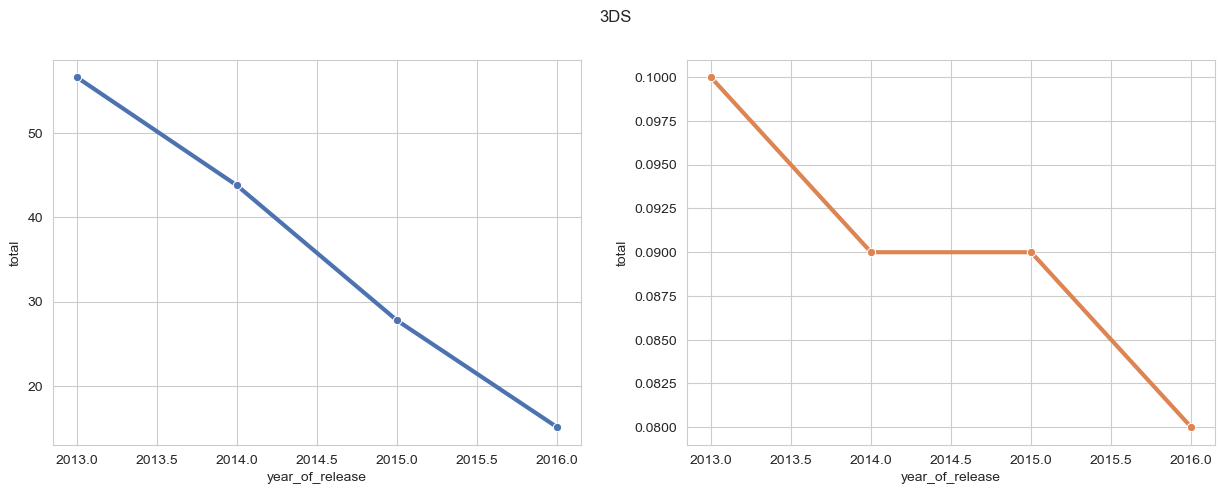

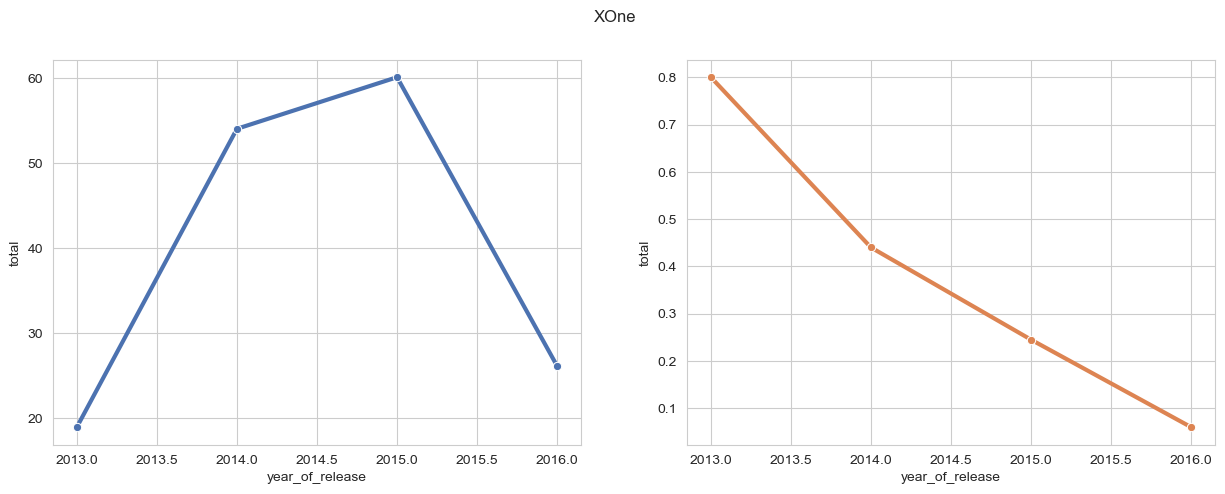

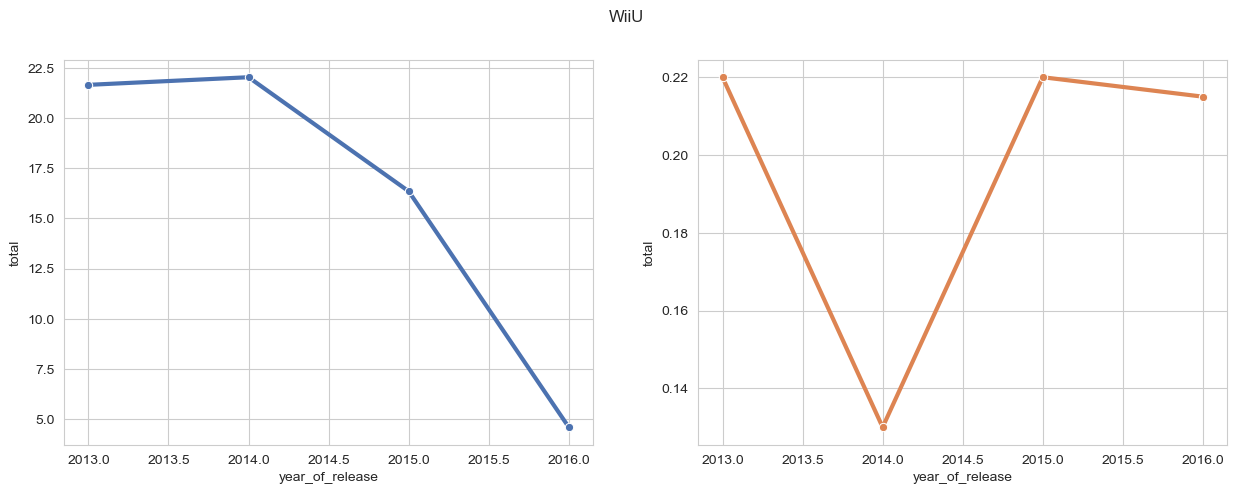

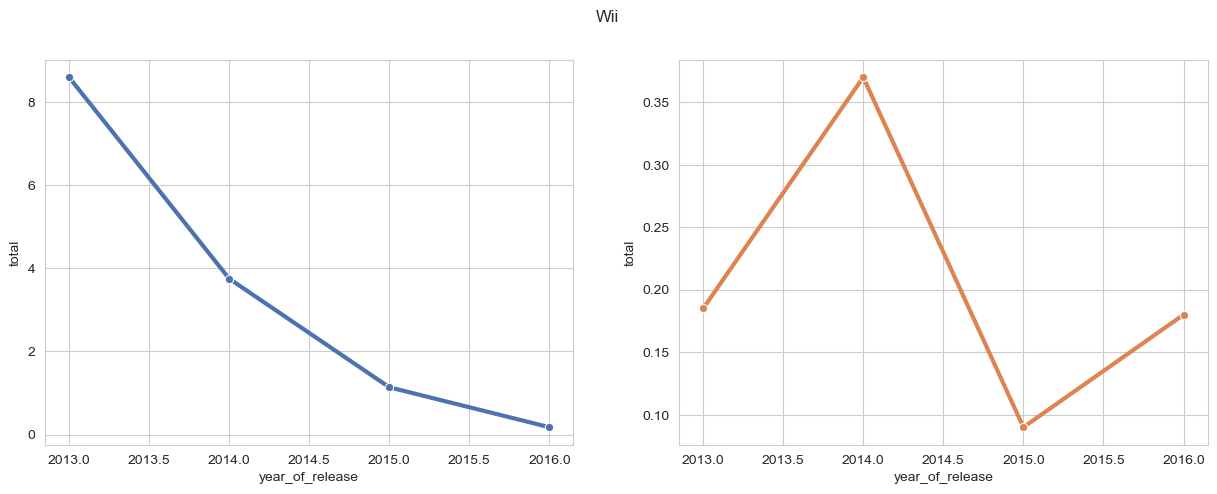

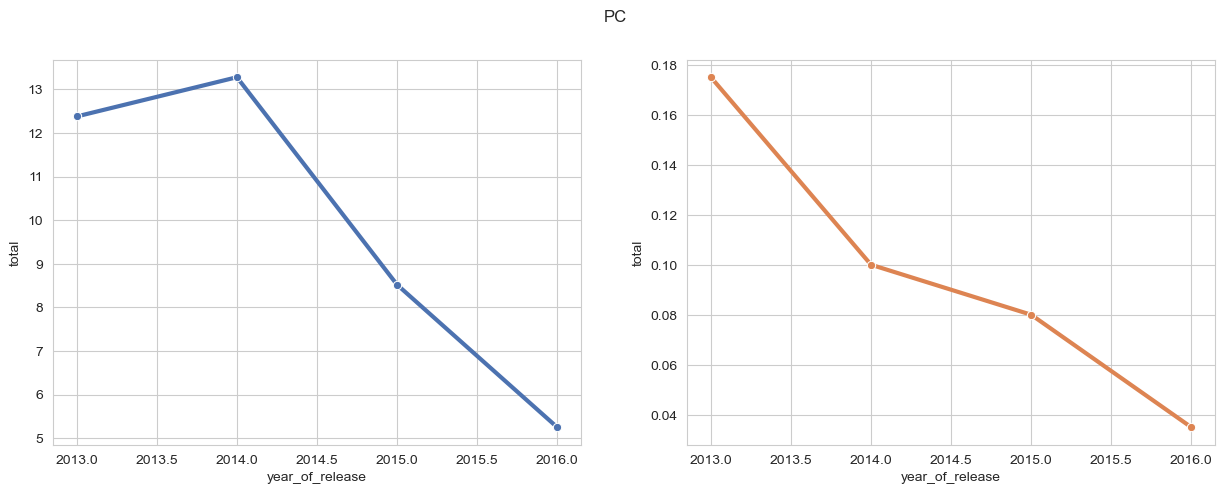

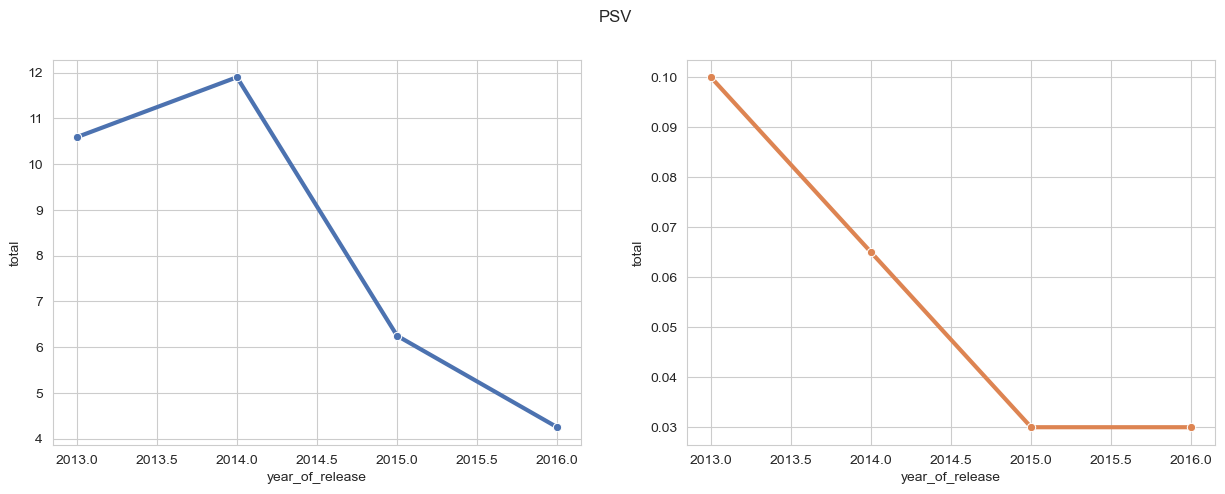

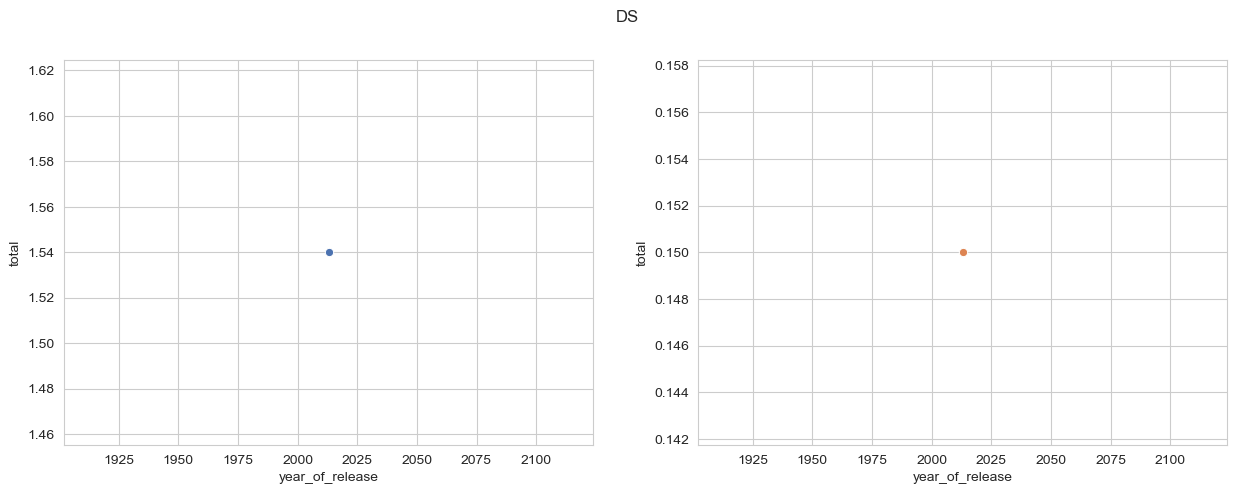

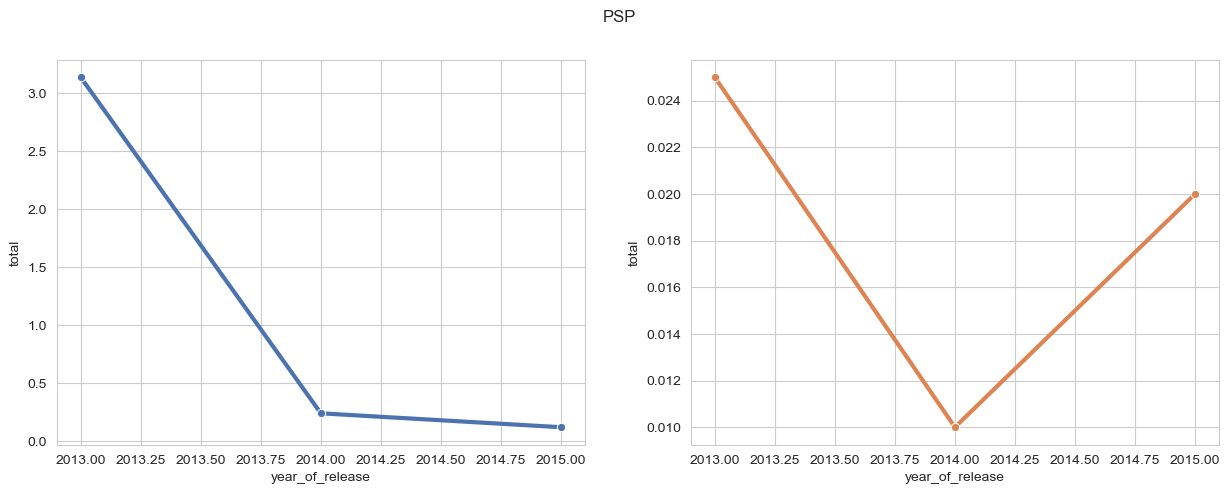

In [71]:
for pl in new_data['platform'].unique():
    fig, ax = plt.subplots(1,2, figsize = (15,5))
    ax = ax.ravel()
    sns.lineplot(data=new_data.query('platform == @pl').pivot_table(index='year_of_release', values='total', aggfunc='sum'), 
                 x='year_of_release',
                 y='total',
                 ax = ax[0], 
                 color=sns.color_palette('deep')[0],
                 marker="o",
                 linewidth=3)
    sns.lineplot(data=new_data.query('platform == @pl').pivot_table(index='year_of_release', values='total', aggfunc='median'), 
                 x='year_of_release',
                 y='total',
                 ax = ax[1], 
                 color=sns.color_palette('deep')[1],
                 marker="o",
                 linewidth=3)
    
    fig.suptitle(pl)

По суммарным продажам лидируют платформы PS4, PS3, XOne, 3DS и X360, по медианным - платформы X360, XOne, WiiU и PS4. 
Можно отметить, что у платформ PS4 и XOne сильно различаются графики суммы и медианы продаж - возможно, что на данных плаформах выпущены игры, которые оказались очень популярными в плане продаж. 

В целом, суммарные продажи падают по всем платформам.

Потенциально прибыльными платформами можно назвать платформы X360, XOne, PS4, WiiU - у них высокие продажи и наибольшее значение медианы.

**5. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам**

In [72]:
px.box(new_data, x="platform", y="total", color='platform') \
.update_yaxes(range=[0, 1]) \
.update_layout(plot_bgcolor='rgba(0,0,0,0)',
              title = {
                         'text': "Диаграмма размаха",
                         'y':0.95, 
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'
                        },
                xaxis_title="Платформа",
                yaxis_title="",
                font=dict(
                        size=15
                        )) \
.update_xaxes(showline=True, 
              linewidth=2, 
              linecolor='black', 
              gridcolor='LightGrey')

Выбросы наблюдаются у платформ PS3, PS4, X360, 3DS, XOne и WiiU. Видимо, на данных платформах имеются игры, которые имели большой успех и высокие продажи. Отметим наибольший межквартильный размах у платформ Wii, X360, PS4, XOne - скорее всего, на данных платформах выпускается много игр для широкой аудитории, что отражается на продажах.

Наибольшее значение медианы - у платформ X360, XOne, WiiU, Wii, PS4.

**6. Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.**

Выберем платформу PS4 - самую прибыльную по суммарным продажам.

In [73]:
px.scatter(new_data.query('platform == "PS4"').sort_values(by='user_score'), 
           x="user_score", 
           y="total", 
           color='total') \
.update_layout(plot_bgcolor='rgba(0,0,0,0)',
                           title = {
                          'text': "Зависимость продаж от оценок пользователей",
                          'y':0.95, 
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'
                        },
               xaxis_title="Оценка пользователей",
               yaxis_title="",
               font=dict(
                        size=15
                        )) \
.update_xaxes(showline=True, 
              linewidth=2, 
              linecolor='black', 
              gridcolor='LightGrey') \
.show()

px.scatter(new_data.query('platform == "PS4"').sort_values(by='critic_score'), 
           x="critic_score", 
           y="total", 
           color='total') \
.update_layout(plot_bgcolor='rgba(0,0,0,0)',
              title = {
                          'text': "Зависимость продаж от оценок критиков",
                          'y':0.95, 
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'
                        },
               xaxis_title="Оценка критиков",
               yaxis_title="",
               font=dict(
                        size=15
                       )) \
.update_xaxes(showline=True, 
              linewidth=2, 
              linecolor='black', 
              gridcolor='LightGrey')

In [74]:
print('Коэффициент корреляции между продажами и оценкой пользователей составляет', 
      new_data.query('platform == "PS4"')['user_score'].corr(new_data.query('platform == "PS4"')['total']))
print()
print('Коэффициент корреляции между продажами и оценкой критиков составляет', 
      new_data.query('platform == "PS4"')['critic_score'].corr(new_data.query('platform == "PS4"')['total']))


Коэффициент корреляции между продажами и оценкой пользователей составляет -0.031957110204556424

Коэффициент корреляции между продажами и оценкой критиков составляет 0.40656790206178095


Исходя из полученных графиков отметим, что явной зависимости между оценками пользователей и продажами нет. В случае с оценками критиков, прослеживается не сильная корреляция, она выражена в основном от оценки в 70. 

Природу данной зависимости можно объяснить тем, что высокий рейтинг игры от критиков привлекает аудиторию и, соответственно, увеличивает продажи.

**7. Соотнести выводы с продажами игр на других платформах.**

Сравним коэффициенты корреляции всех платформ от total:

In [75]:
сoeff_user = {}

for i in new_data['platform'].unique():
    сoeff_user[i] = [new_data.loc[new_data['platform'] == i][['user_score', 'critic_score', 'total']].corr()[['total']].reset_index()['total'][0], new_data.loc[new_data['platform'] == i][['user_score', 'critic_score', 'total']].corr()[['total']].reset_index()['total'][1]]

In [76]:
coeff = pd.DataFrame.from_dict(сoeff_user).rename(index={0:'user_score', 1:'critic_score'})
coeff = coeff.transpose().reset_index().sort_values(by='critic_score')

In [77]:
coeff['user_score'] = round(coeff['user_score'], 2)
coeff['critic_score'] = round(coeff['critic_score'], 2)

In [78]:
coeff.sort_values(by='critic_score')

index  user_score  critic_score
7     PC       -0.09          0.20
8    PSV        0.00          0.25
0    PS3        0.00          0.33
1   X360       -0.01          0.35
3    3DS        0.24          0.36
5   WiiU        0.42          0.38
2    PS4       -0.03          0.41
4   XOne       -0.07          0.42
6    Wii        0.68           NaN
9     DS         NaN           NaN
10   PSP       -1.00           NaN

In [79]:
px.bar(coeff, 
       x=['user_score', 'critic_score'], 
       y='index', barmode='group',
       text_auto=True,                       
       color_discrete_map={'critic_score': '#fb9f3a', 'user_score': 'royalblue'}) \
.update_layout(plot_bgcolor='rgba(0,0,0,0)', 
               autosize=False,
               title={
                          'text': "Зависимость продаж от оценок пользователей и критиков",
                          'y':0.98, 
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'
                        },
               xaxis_title="Коэффициент корреляции",
               yaxis_title="",
               font=dict(
                        size=15),
               width=1050,
               height=800,
               legend=dict(
                            title='Оценки',
                            yanchor="bottom",
                            y=0.01,
                            xanchor="left",
                            x=0.8
                            )) \
.update_xaxes(showline=True, 
              linewidth=2, 
              linecolor='black', 
              gridcolor='LightGrey', 
              range=[-0.1, 0.45])
#d8576b
#ed7953
#fb9f3a

Рассмотрим корреляцию для остальных платформ отдельно:

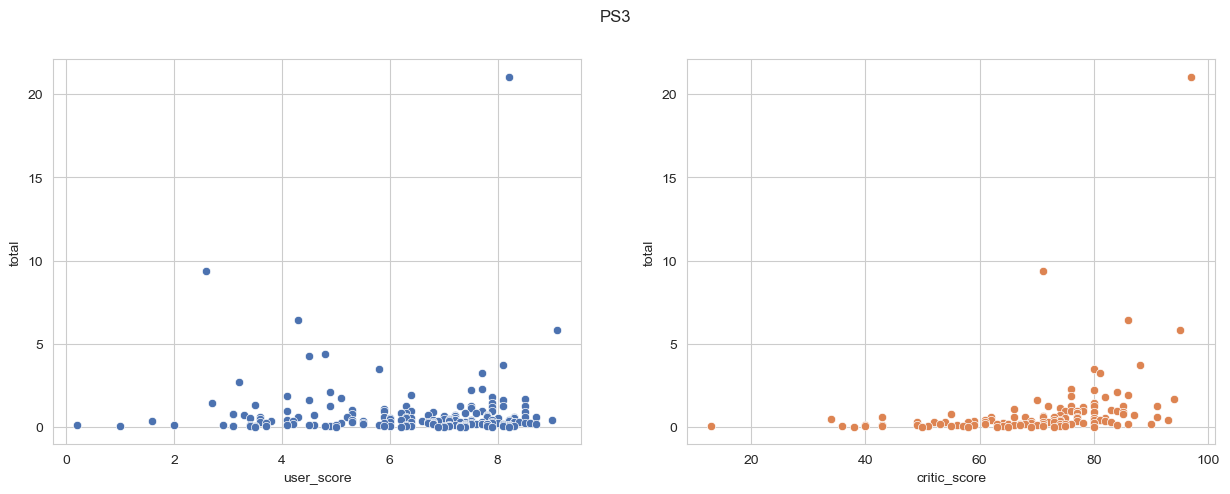

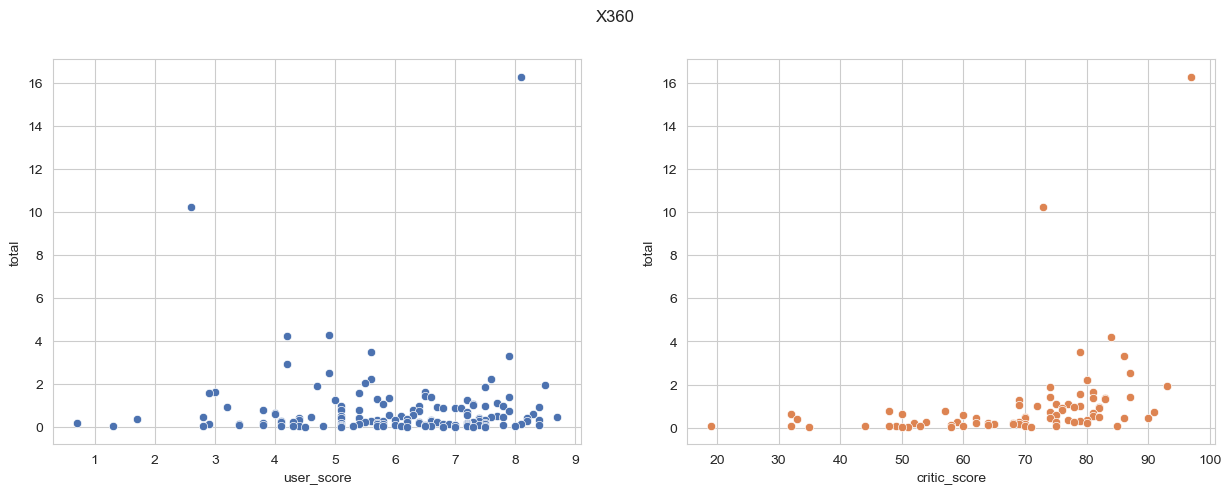

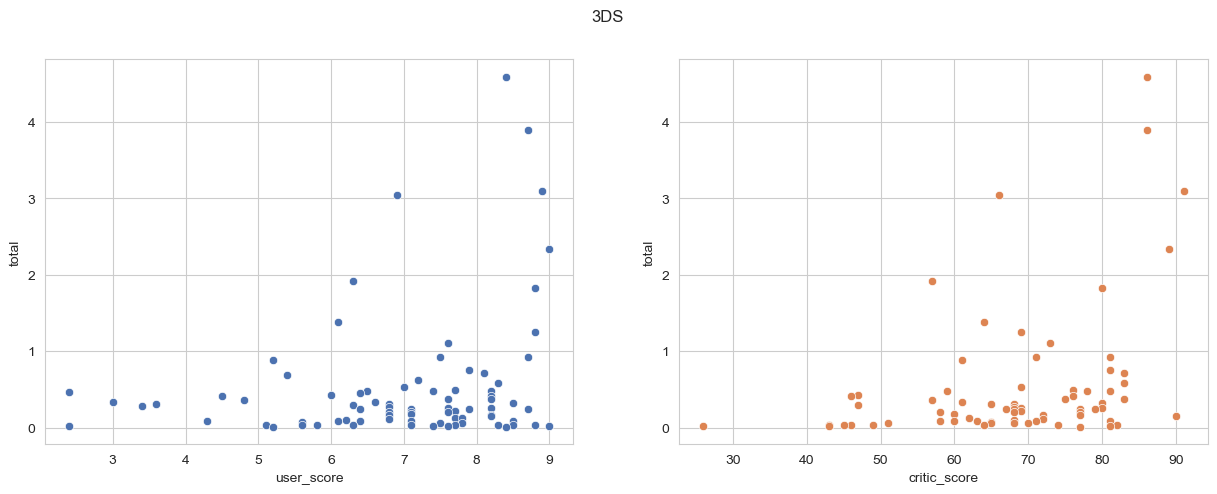

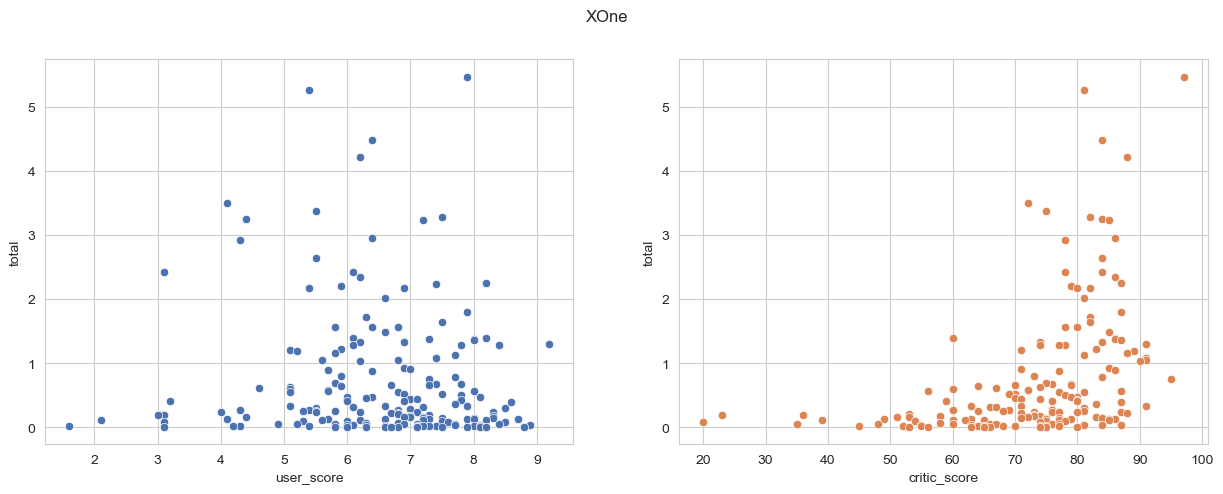

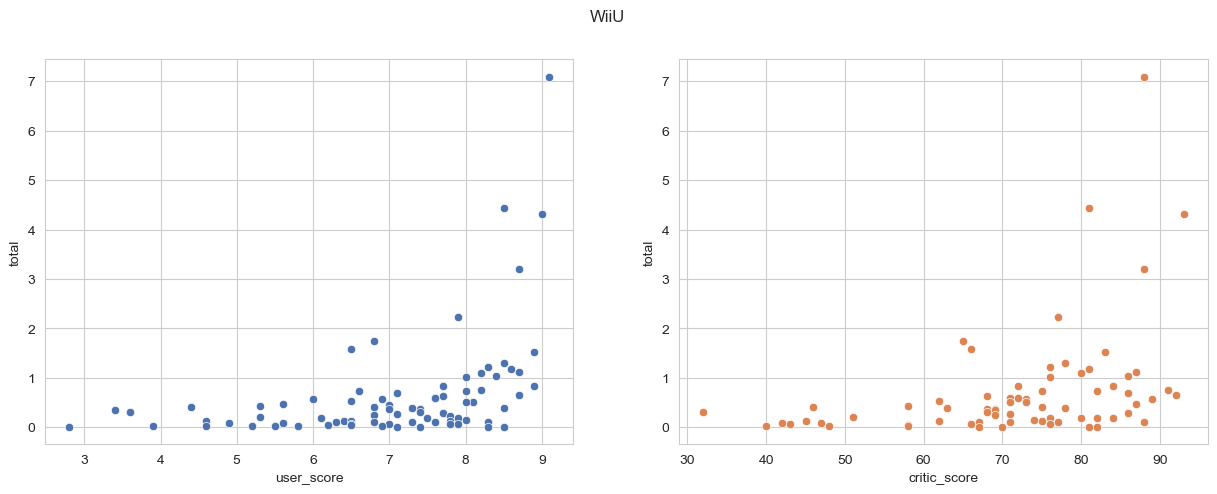

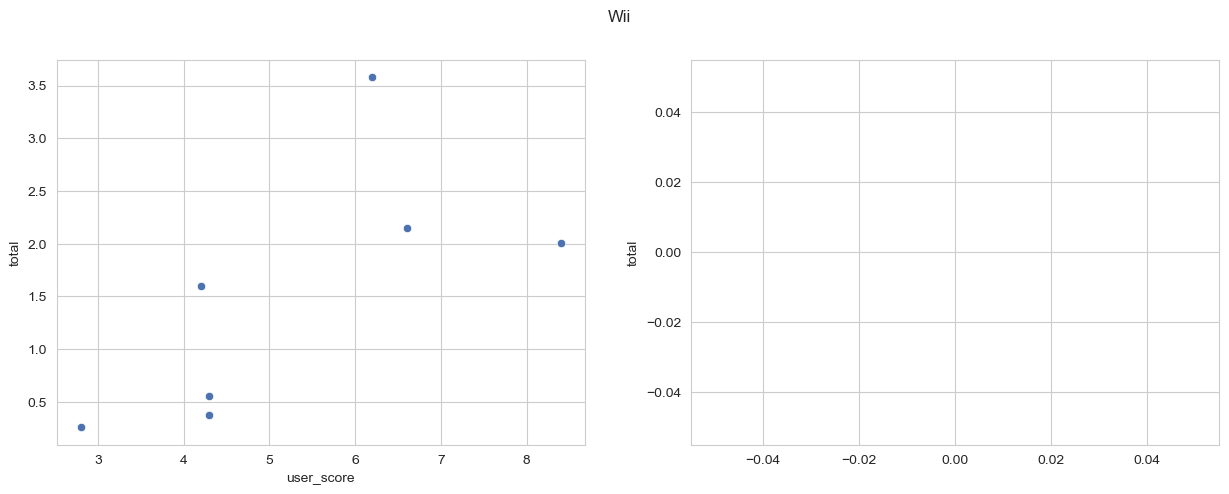

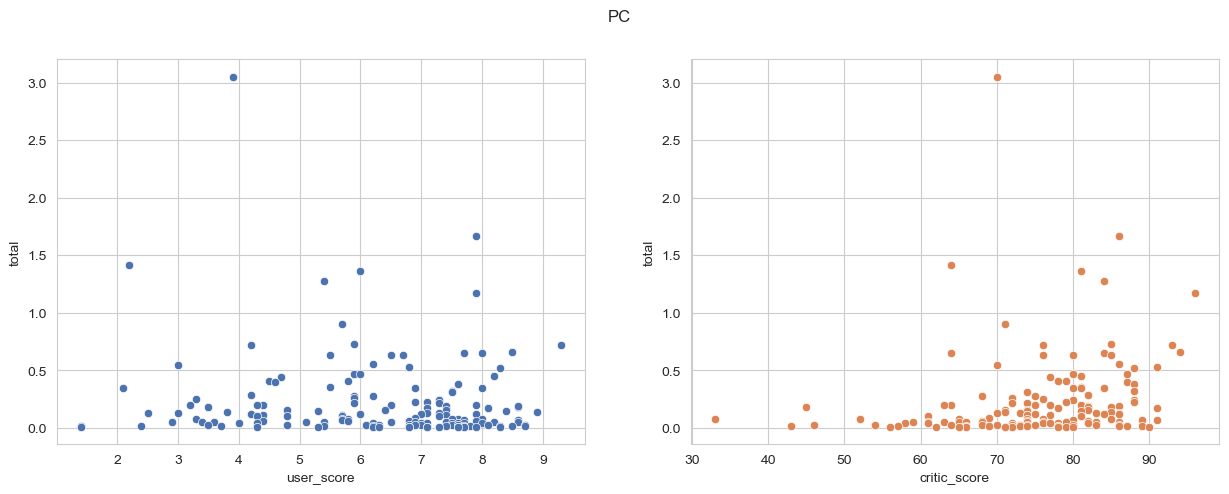

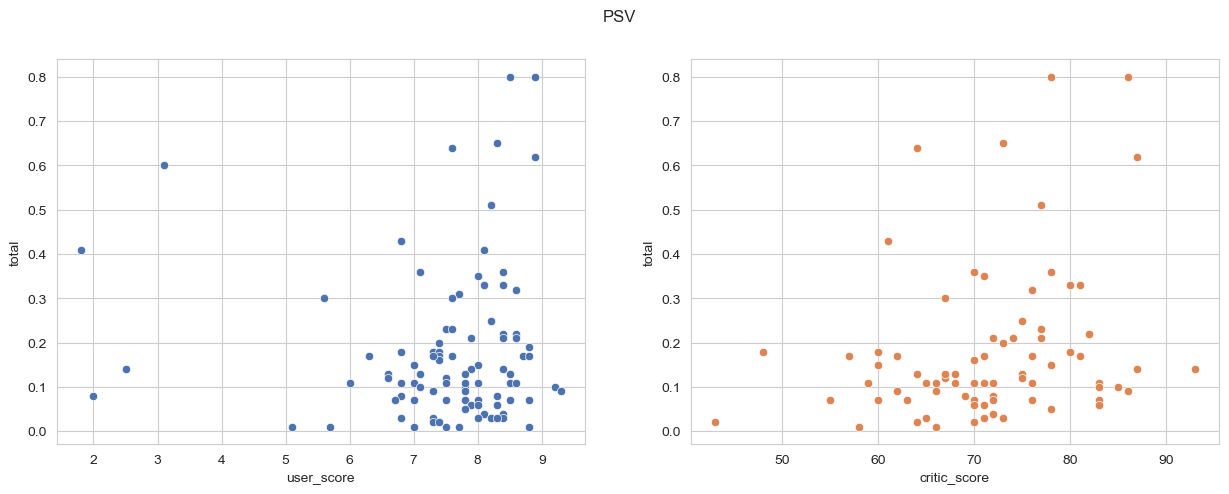

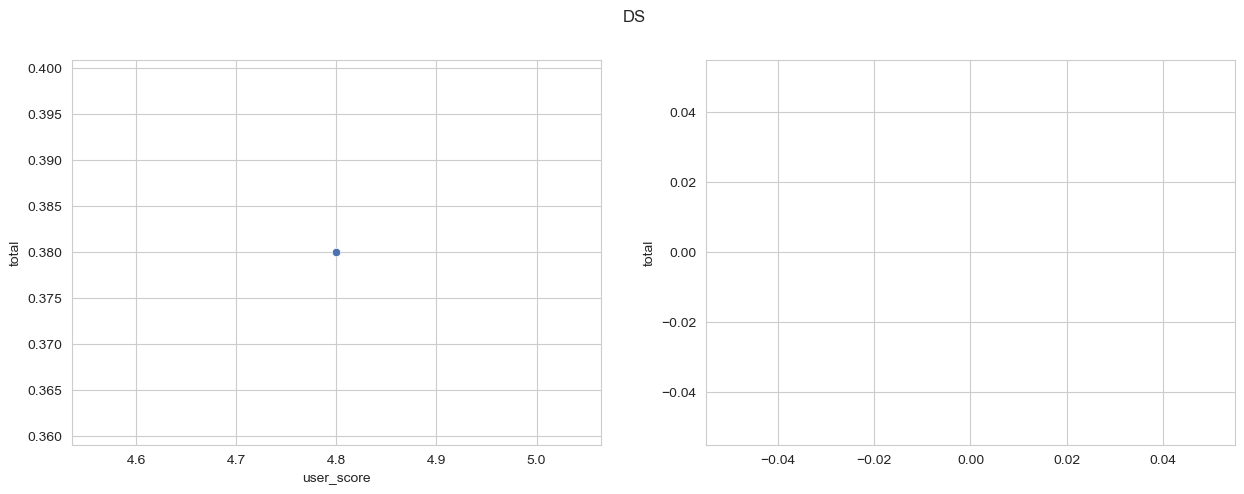

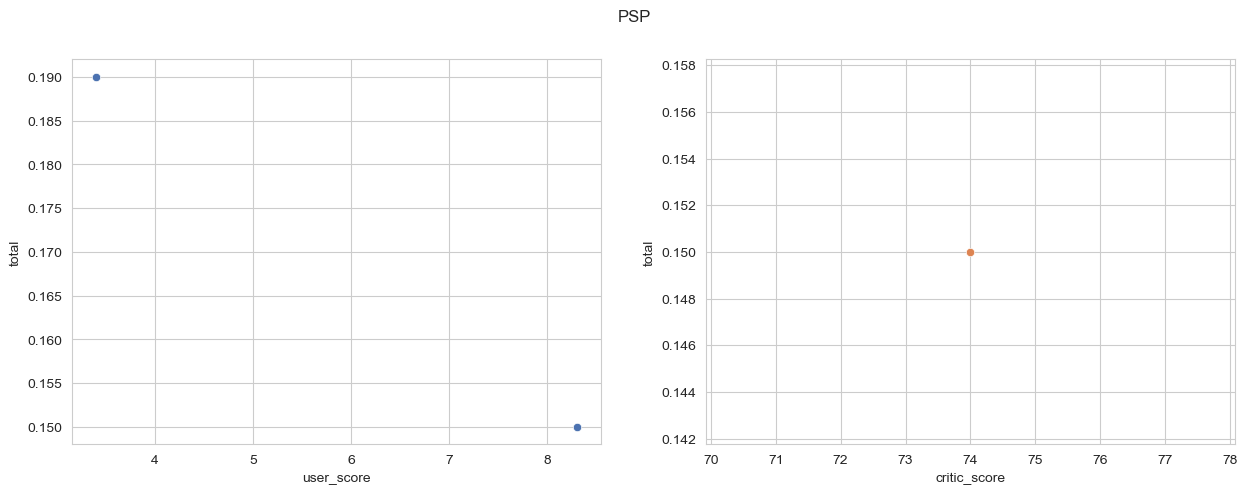

In [80]:
for pl in new_data.query('platform != "PS4"')['platform'].unique():
    fig, ax = plt.subplots(1,2, figsize = (15,5))
    ax = ax.ravel()
    sns.scatterplot(data=new_data.query('platform == @pl'), 
                    x='user_score', 
                    y='total', 
                    ax = ax[0], 
                    color=sns.color_palette('deep')[0])
    sns.scatterplot(data=new_data.query('platform == @pl'), 
                    x='critic_score', 
                    y='total', 
                    ax = ax[1], 
                    color=sns.color_palette('deep')[1])
    fig.suptitle(pl)

Наибольшая корреляция между оценками критиков и продажами отмечается у платформы XOne - 0.42, далее по убыванию - PS4 (0.41), WiiU (0.38), 3DS (0.36), X360 (0.35), PS3 (0.33), PSV (0.25) и PC (0.2). В целом, есть корреляция между оценками критиков и продажами, особенно она выражена в оценке от 70 и у платформ с наибольшими суммарными продажами.

У платформ Wii, DS и PSP нет коэффициента корреляции из-за недостаточного количества оценок.

Корреляции между оценками пользователей и продажами в целом не наблюдается. У платформы Wii коэффиент корреляции составляет 0.68, но из-за недостаточного количества оценок данная корреляция не достоверна.

**8. Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [81]:
# найдем общие продажи, среднее и медиану для каждого жанра
genre = new_data.pivot_table(index='genre', values='total', aggfunc=['sum', 'mean', 'median', 'count']).reset_index()

В основном будем ориентироваться не сколько на суммарные продажи, сколько на медиану, так как среди различных жанров могут попадаться игры с очень высокими продажами, которые выбиваются от всех остальных. Это может повлиять на сумму продаж и тогда данные можно интерпретировать некорректно.

In [82]:
genre.columns = ['genre', 'sum', 'mean', 'median', 'count']
genre = genre.sort_values(by='median')
genre['mean'] = round(genre['mean'], 2)
genre['median'] = round(genre['median'], 2)

In [83]:
genre

genre     sum  mean  median  count
1      Adventure   23.64  0.10    0.03    245
5         Puzzle    3.17  0.19    0.06     17
11      Strategy   10.08  0.18    0.08     56
3           Misc   62.82  0.41    0.10    155
9     Simulation   21.76  0.35    0.10     62
0         Action  321.87  0.42    0.11    766
6         Racing   39.89  0.47    0.12     85
2       Fighting   35.31  0.44    0.12     80
7   Role-Playing  145.89  0.50    0.12    292
4       Platform   42.63  0.58    0.22     74
10        Sports  150.65  0.70    0.24    214
8        Shooter  232.98  1.25    0.45    187

In [84]:
px.bar(genre, 
       x=['mean', 'median'], 
       y='genre', 
       color_discrete_map={"mean":"royalblue", "median":"#fb9f3a"}, 
       text_auto=True,
       barmode='group',) \
.update_layout(plot_bgcolor='rgba(0,0,0,0)',
              autosize=False,
              width=990,
              height=800,
              title = {
                          'text': "Распределение игр по жанрам",
                          'y':0.98, 
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'
                        },
                xaxis_title="Среднее и медиана",
                yaxis_title="",
                      font=dict(
                                size=15),
                legend=dict(
                            title='Значения',
                            yanchor="bottom",
                            y=0.01,
                            xanchor="left",
                            x=0.8)) \
.update_xaxes(showline=True, 
              linewidth=2, 
              linecolor='black', 
              gridcolor='LightGrey')

Наиболее перспективным жанром можно назвать `Shooter`, у него значения медианы (0.45) и среднего (1.25) - самые высокие значения среди жанров. 

Исходя из суммарных продаж, самый доходный жанр - `Action`, но значения медианы и среднего - 0.11 и 0.42 соответственно, что  меньше по сравнению с жанром Shooter. Количество проданных игр жанра Action намного больше, чем в жанре Shooter, но суммарные продажи при этом не намного выше. Скорее всего, в жанре Action было представлено несколько игр с очень высокими продажами, которые повлияли на значение продаж.

Также среди популярных жанров можно выделить `Sports и Platform`. У жанра Sports достаточно высокие продажи, при этом значение медианы тоже высокое.

Наименее перспективные жанры - `Adventure, Puzzle, Strategy`. В жанре Adventure представлено достаточно много игр, но из-за низкой стоимости и, скорее всего, спроса, показатели невысокие.

**Общий вывод:**
- Определили характерный срок появления/ухода новых и старых платформы - 10 лет. Также, продажи начинают падать после 4-5 лет после появления платформы на рынке. С 2012 по 2013 количество новых платформ увеличилось, с 2013 количество новых платформ уменьшалось.


- Определили актуальный период для исследования данных - 2013-2016 гг.


- Наиболее потенциально прибыльные платформы - XOne, PS4, X360, WiiU - у них высокие продажи и наибольшее значение медианы. С 2008 года продажи упали по всем платформам. Из возможных причин - экономический кризис, появление социальных сетей/мобильных устройств.


- Явной зависимости между оценками пользователей и продажами нет. В случае с оценками критиков, есть корреляция между оценками критиков и продажами, особенно она выражена в оценке от 70 и у платформ с наибольшими суммарными продажами. Природу данной зависимости можно объяснить тем, что высокий рейтинг игры от критиков привлекает аудиторию и, соответственно, увеличивает продажи.


- Наиболее перспективным жанром можно назвать Shooter, у него значения медианы (0.45) и среднего (1.25) - самые высокие значения среди жанров. Также популярны жанры, такие как Sports и Platform. Наименее перспективные жанры - Adventure, Puzzle, Strategy. В жанре Adventure представлено достаточно много игр, но из-за низкой стоимости и, скорее всего, спроса, показатели невысокие.

## Шаг 4. Составить портрет пользователя каждого региона

Определить для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). Описать различия в долях продаж.
- Самые популярные жанры (топ-5). Пояснить разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**1. Самые популярные платформы (топ-5) в регионах - Северная Америка, Европа и Япония**

In [85]:
na_data = new_data.pivot_table(index='platform', values='na_sales', aggfunc='sum') \
                  .sort_values(by='na_sales', ascending=False).reset_index()
na_data['na_sales'] = round(na_data['na_sales'] / sum(na_data['na_sales']), 2)
na_data = na_data.head()

eu_data = new_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum') \
                  .sort_values(by='eu_sales', ascending=False).reset_index()
eu_data['eu_sales'] = round(eu_data['eu_sales'] / sum(eu_data['eu_sales']), 2)
eu_data = eu_data.head()

jp_data = new_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum') \
                  .sort_values(by='jp_sales', ascending=False).reset_index()
jp_data['jp_sales'] = round(jp_data['jp_sales'] / sum(jp_data['jp_sales']), 2)
jp_data = jp_data.head()

In [86]:
na_data.merge(eu_data, how='outer', on='platform').merge(jp_data, how='outer', on='platform')

platform  na_sales  eu_sales  jp_sales
0      PS4      0.25      0.36      0.11
1     XOne      0.21      0.13       NaN
2     X360      0.19      0.11       NaN
3      PS3      0.15      0.17      0.17
4      3DS      0.09      0.08      0.48
5      PSV       NaN       NaN      0.13
6     WiiU       NaN       NaN      0.08

In [87]:
px.bar(na_data.merge(eu_data, how='outer', on='platform').merge(jp_data, how='outer', on='platform'), 
       x='platform', 
       y=['na_sales', 'eu_sales', 'jp_sales'], 
       color_discrete_sequence= px.colors.sequential.Emrld,
       text_auto=True).update_layout(plot_bgcolor='rgba(0,0,0,0)') \
.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='LightGrey') \
.update_layout(plot_bgcolor='rgba(0,0,0,0)',
              autosize=False,
              width=950,
              height=600,
              title = {
                          'text': "Самые популярные платформы по регионам",
                          'y':0.98, 
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'
                        },
                xaxis_title="Платформа",
                yaxis_title="Доля",
                      font=dict(
                                size=15),
                ) 

В Северной Америке наиболее популярными платформами являются `PS4, XOne, X360, PS3` - доля от общих продаж составляет 0.25, 0.21, 0.19, 0.15 соответственно. Платформа 3DS пользуется меньшим спросом - 0.09, а платформы PSV и WiiU не представлены вовсе.

Платформа `PS4` является самой популярной в Европе - 36% от общих продаж, менее популярные -  XOne(13%), X360(11%), PS3(17%), 3DS(8%). Платформы PSV и WiiU не представлены.

Для Японии лидером продаж является `3DS` - 48% от продаж. Менее популярные платформы - PS3 (17%) и PS4 (11%).Представлены платформы PSV (13%) и WiiU (8%) - они пользуются спросом только в Японии. 

**2. Самые популярные жанры (топ-5) в регионах - Северная Америка, Европа и Япония**

In [88]:
na_data = new_data.pivot_table(index='genre', values='na_sales', aggfunc='sum') \
                  .sort_values(by='na_sales', ascending=False).reset_index()
na_data['na_sales'] = round(na_data['na_sales'] / sum(na_data['na_sales']), 2)
na_data = na_data.head()

eu_data = new_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum') \
                  .sort_values(by='eu_sales', ascending=False).reset_index()
eu_data['eu_sales'] = round(eu_data['eu_sales'] / sum(eu_data['eu_sales']), 2)
eu_data = eu_data.head()

jp_data = new_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum') \
                  .sort_values(by='jp_sales', ascending=False).reset_index()
jp_data['jp_sales'] = round(jp_data['jp_sales'] / sum(jp_data['jp_sales']), 2)
jp_data = jp_data.head()

In [89]:
na_data.merge(eu_data, how='outer', on='genre').merge(jp_data, how='outer', on='genre')

genre  na_sales  eu_sales  jp_sales
0        Action      0.29      0.30      0.29
1       Shooter      0.25      0.22      0.05
2        Sports      0.15      0.15       NaN
3  Role-Playing      0.11      0.09      0.36
4          Misc      0.06       NaN      0.07
5        Racing       NaN      0.05       NaN
6      Fighting       NaN       NaN      0.05

In [90]:
px.bar(na_data.merge(eu_data, how='outer', on='genre').merge(jp_data, how='outer', on='genre'), 
       x='genre', 
       y=['na_sales', 'eu_sales', 'jp_sales'], 
       color_discrete_sequence= px.colors.sequential.Emrld,
       text_auto=True).update_layout(plot_bgcolor='rgba(0,0,0,0)') \
.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='LightGrey') \
.update_layout(plot_bgcolor='rgba(0,0,0,0)',
              autosize=False,
              width=950,
              height=600,
              title = {
                          'text': "Самые популярные жанры по регионам",
                          'y':0.98, 
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'
                        },
                xaxis_title="Жанр",
                yaxis_title="Доля",
                      font=dict(
                                size=15),
                ) 

Наиболее популярными жанрами игр в Северной Америке являются `Action(29%), Shooter(25%), Sports(15%), Role-playing(11%) и Misc(6%)`.

В Европе наиболее популярные жанры - `Action(30%), Shooter(22%), Sports(15%), Role-playing(9%) и Misc(6%)`.

Жанры `Role-Playing(36%) и Action(29%)` - самые популярные в Японии. Жанр Sport, который входит в пятерку жанров в Северной Америке и Европе, не является популярным в Японии. Жарн Fighting (5%) популярен в Японии, а в Северной Америке и Европе он не входит в топ-5.

**3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [91]:
na_data = new_data.pivot_table(index='rating', values='na_sales', aggfunc='sum') \
                  .sort_values(by='na_sales', ascending=False).reset_index()
na_data['na_sales'] = round(na_data['na_sales'] / sum(na_data['na_sales']), 2)

eu_data = new_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum') \
                   .sort_values(by='eu_sales', ascending=False).reset_index()
eu_data['eu_sales'] = round(eu_data['eu_sales'] / sum(eu_data['eu_sales']), 2)

jp_data = new_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum') \
                  .sort_values(by='jp_sales', ascending=False).reset_index()
jp_data['jp_sales'] = round(jp_data['jp_sales'] / sum(jp_data['jp_sales']), 2)

In [92]:
na_data.merge(eu_data, how='outer', on='rating').merge(jp_data, how='outer', on='rating')

rating  na_sales  eu_sales  jp_sales
0      M      0.38      0.37      0.10
1  other      0.20      0.20      0.60
2      E      0.18      0.21      0.11
3   E10+      0.12      0.11      0.04
4      T      0.11      0.11      0.15

In [93]:
px.bar(na_data.merge(eu_data, how='outer', on='rating').merge(jp_data, how='outer', on='rating'), 
       x='rating', 
       y=['na_sales', 'eu_sales', 'jp_sales'], 
       color_discrete_sequence= px.colors.sequential.Emrld,
       text_auto=True).update_layout(plot_bgcolor='rgba(0,0,0,0)') \
.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='LightGrey') \
.update_layout(plot_bgcolor='rgba(0,0,0,0)',
              autosize=False,
              width=950,
              height=600,
              title = {
                          'text': "Влияние рейтинга ESRB на продажи",
                          'y':0.98, 
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'
                        },
                xaxis_title="Рейтинг",
                yaxis_title="Доля",
                      font=dict(
                                size=15),
                ) 

В Северной Америке и Европе больше всего на продажи влияет рейтинг `М («Для взрослых»)` - 38% и 37% соответственно. Менее значительное влияние в Северной Америке и Европе у рейтингов E («Для всех») - по 20%, other («Другие») - 18% и 21% соотвественно, Е10+(«Для всех от 10 лет и старше») - 12% и 11%, Т(«Подросткам») - по 11%.

Для Японии влияние рейтинга M не значительно - всего 10%. А вот рейтинг `other (рейтинг не определен)` влияет значительно - 60%. Также влияют на продажи рейтинг Т(«Подросткам») - 15%, E («Для всех») - 11%,  Е10+(«Для всех от 10 лет и старше») - 4%.

## Шаг 5. Проверить гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Рассматриваемые данные не зависят друг от друга, а размер выборки достаточен. Поэтому для проверки гипотез используем t-тест с помощью метода `ttest_ind`

**Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковы**

Рассмотрим следующие гипотезы:

`Нулевая гипотеза Н0` - Средние пользовательские рейтинги платформ Xbox One и PC одинаковы

`Альтернативная гипотеза Н1` - Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [94]:
# sample_1 -  данные рейтинга платформы Xbox One
sample_1 = new_data.query('platform =="XOne" and not user_score.isna()')['user_score']
# sample_2 - данные рейтинга платформы Xbox One
sample_2 = new_data.query('platform =="PC" and not user_score.isna()')['user_score'] 

# проверим, равны ли дисперсии данных рейтинга платформы Xbox One и данные рейтинга платформы Xbox One:
if np.var(sample_1) == np.var(sample_2):
    var = True
else:
    var = False

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2, equal_var = var)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


`Отвергнуть нулевую гипотезу не получилось, значит средние пользовательские рейтинги платформ Xbox One и PC одинаковы.`

**Гипотеза 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Рассмотрим гипотезы:

Нулевая гипотеза Н0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые

Альтернативная гипотеза Н1 - Средние пользовательские рейтинги жанров Action и Sports разные

In [95]:
# sample_1 - данные пользовательских рейтингов жанра Action
sample_1 = new_data.query('genre =="Action" and not user_score.isna()')['user_score'] 
# sample_2 - данные пользовательских рейтингов жанра Sports
sample_2 = new_data.query('genre =="Sports" and not user_score.isna()')['user_score']

# проверим, равны ли дисперсии данных пользовательских рейтингов жанра Action и Sports
if np.var(sample_1) == np.var(sample_2):
    var = True
else:
    var = False

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2, equal_var = var)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


`Получилось отвергнуть нулевую гипотезу. Значит, средние пользовательские рейтинги жанров Action и Sports разные`

## Шаг 6. Общий вывод

Было проведено исследование, чтобы выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Входные данные - исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы Интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. 

**`В ходе исследования выявлены следующие закономерности:`**
- Явной зависимости между оценками пользователей и продажами нет. 
- Присутствует средняя корреляция между оценками критиков и продажами, особенно она выражена в оценке от 70 и у платформ с наибольшими суммарными продажами - `XOne (0.42), PS4 (0.41), 3DS (0.36), X360 (0.35)` - с ростом оценок увеличивается прибыль.
- Наиболее популярными платформами в плане продаж на ближайшие годы являются PS4, XOne, X360 и WiiU - необходимо продавать больше игр на данных платформах.
- Наиболее перспективным жанром можно назвать `Shooter`, значения медианы (0.45) и среднего (1.25) данного жанра- самые высокие значения среди всех жанров. Самый доходный жанр - `Action`, но значения медианы и среднего - 0.11 и 0.42 соответственно, что меньше по сравнению с жанром Shooter (скорее всего, в жанре Action было представлено несколько игр с очень высокими продажами, которые повлияли на значение продаж.). Также популярны жанры, такие как `Sports и Platform`. Наименее перспективные жанры - Adventure, Puzzle, Strategy. 
- Необходимо учитывать специфику регионов: в Северной Америке и Европе больше всего на продажи влияет `рейтинг М («Для взрослых»)` - 38% и 37% от общих продаж соответственно. Для Японии влияние рейтинга M не значительно - всего 10%. А вот рейтинг `other (рейтинг не определен)` влияет достаточно сильно - 60% от общих продаж.
- В Северной Америке наиболее популярными платформами являются `PS4, XOne, X360, PS3` - доля от общих продаж составляет 0.25, 0.21, 0.19, 0.15 соответственно. Платформа `PS4` является самой популярной в Европе - 36% от общих продаж. Для Японии лидером продаж является 3DS - 48% от продаж. Представлены платформы PSV (13%) и WiiU (8%) - они пользуются спросом только в Японии.
- Наиболее популярными жанрами игр в Северной Америке являются `Action(29%), Shooter(25%), Sports(15%), Role-playing(11%) и Misc(6%)`. В Европе наиболее популярные жанры - `Action(30%), Shooter(22%), Sports(15%), Role-playing(9%) и Misc(6%)`. Жанры `Role-Playing(36%) и Action(29%)` - самые популярные в Японии.


**`Были подтверждены следующие гипотезы:`**
- *Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.*
p-value составило 0.15, следовательно, не отвергаем данную гипотезу.
- *Средние пользовательские рейтинги жанров Action и Sports разные.*
За нулевую гипотезу приняли, что средние пользовательские рейтинги жанров Action и Sports одинаковые, за альтернативную - средние пользовательские рейтинги жанров Action и Sports разные. С учетом полученного значения p-value 1.45e-20, отвергли нулевую гипотезу. Следовательно, средние пользовательские рейтинги жанров Action и Sports разные.




**`Общие рекомендации:`**
- Необходимо учитывать, что продажи начинают падать после 4-5 лет после появления новой платформы на рынке. По достижении данного срока следует продавать игры на новых платформах, которые набирают популярность и выпускать на старых платформах меньшее количество игр.
- Рассмотреть более детально зависимость между оценками пользователей и продажами, а также гипотезы о равенстве пользовательских рейтингов платформ Xbox One и PC и жанров Action и Sports.
- Необходимы дополнительные сведения о категории `other`в столбце rating